# Fake News Natural Language Processing project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing data. One data set is real news articles and one is fake news articles.

In [2]:
true = pd.read_csv('True.csv')

In [3]:
false = pd.read_csv('Fake.csv')

Checking the data

In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Adding columns in each dataframe indicating whether it is real or fake news. Real news is assigned as '1' and fake news is '0'.

In [5]:
true['truth'] = 1

In [6]:
false['truth'] = 0

Checking the information about each dataframe.

In [7]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   truth    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [8]:
false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   truth    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


Concating the two dataframes together into a single dataframe to analyze.

In [9]:
news = pd.concat([true,false])

In [10]:
news.head()

,title,text,subject,date,truth
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Checking the numbers of truthful articles and fake news article.

In [11]:
news['truth'].value_counts()

0    23481
1    21417
Name: truth, dtype: int64

## How many different subjects are there in the dataframe?

In [12]:
news['subject'].unique()
news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## What percentage of the news in the file is from Left-News outlets?

In [13]:
false[false['subject'] == 'left-news'].count() / false['subject'].value_counts().sum()

title      0.189898
text       0.189898
subject    0.189898
date       0.189898
truth      0.189898
dtype: float64

It appears that only about 19% of the news is considered 'left-news', while 80% is right-news. 

## Plotting the count of the different subjects in the news in general.

In [15]:
import seaborn as sns

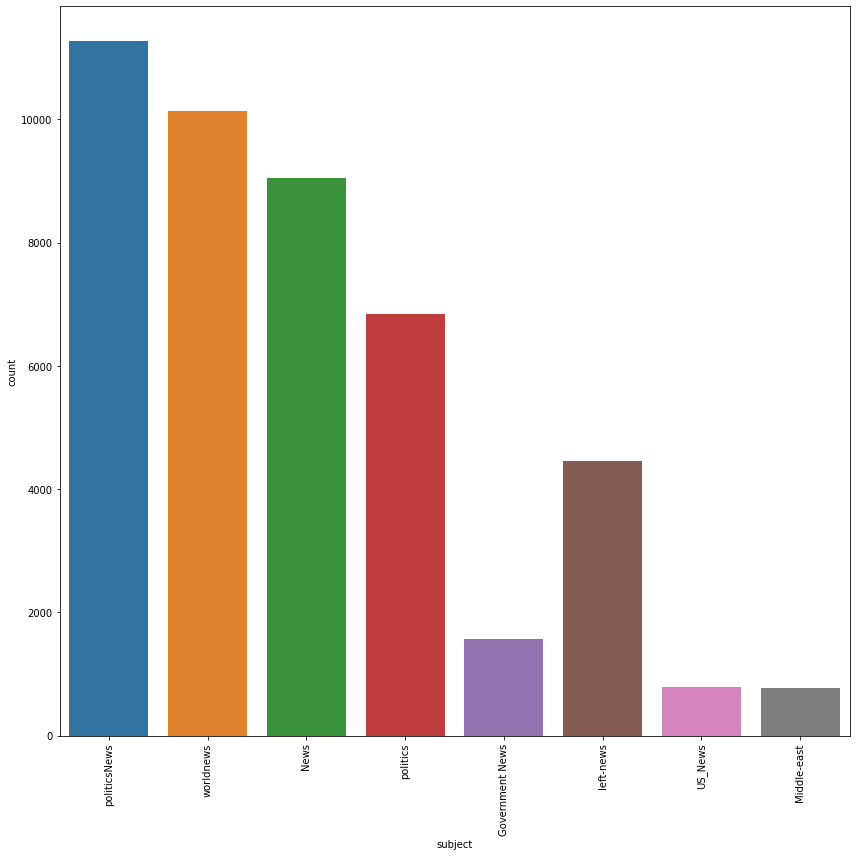

In [16]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'subject', data = news)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

## Let's visualize how much of each subject there is in real news.

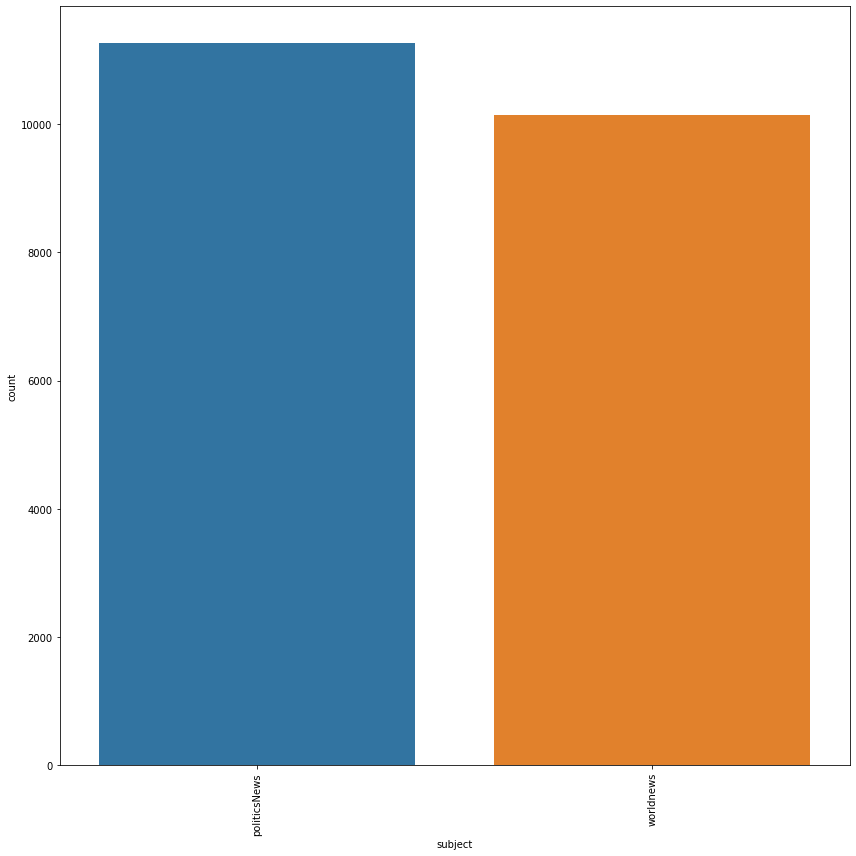

In [17]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'subject', data = true)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

## Now, let's have a look at the different subjects in false news.

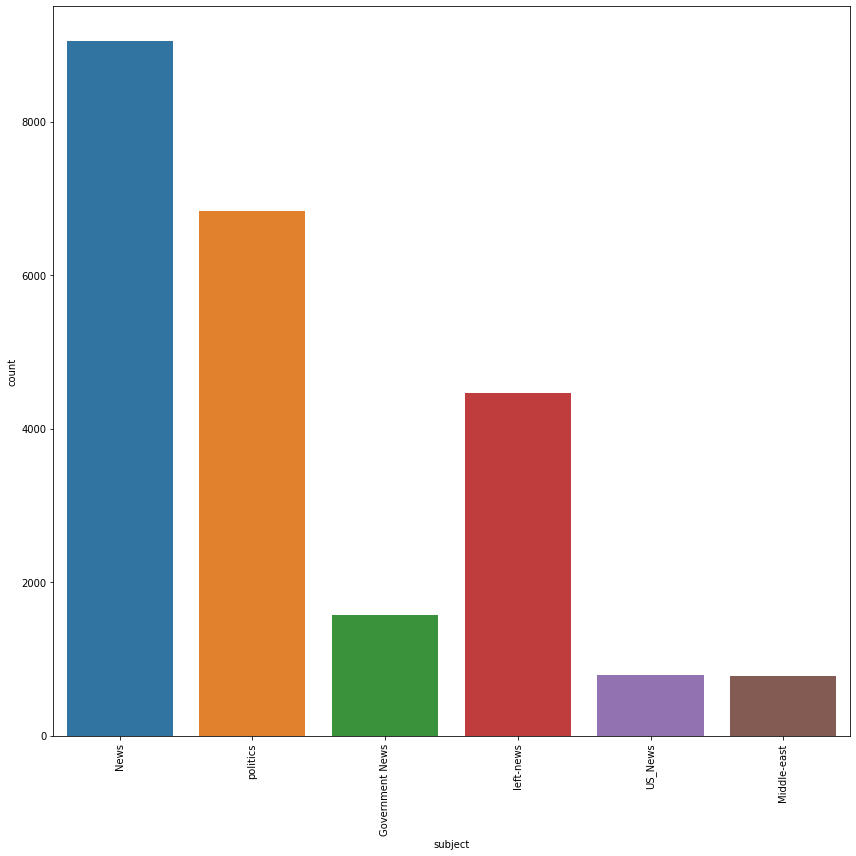

In [18]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'subject', data = false)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

## Creating two new columns, text_length and title_length, which are the word counts of both the text and the title.

In [19]:
news['text_length'] = news['text'].apply(len)

In [20]:
news['title_length'] = news['title'].apply(len)

In [21]:
news.head()

,title,text,subject,date,truth,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204,69


## Plotting the word counts of each article. The X axis is 'truth', and the Y axis is the length of the text or the title, respectively. The different colors represent the subject.

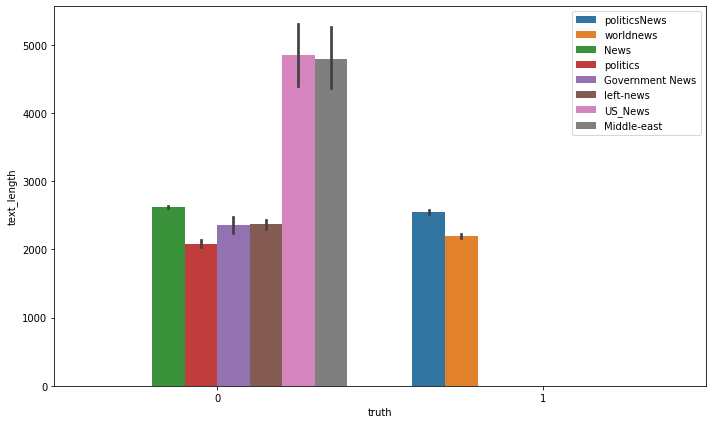

In [22]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'truth', y = 'text_length', data = news, hue = 'subject')
#plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()
plt.legend(loc='upper right')

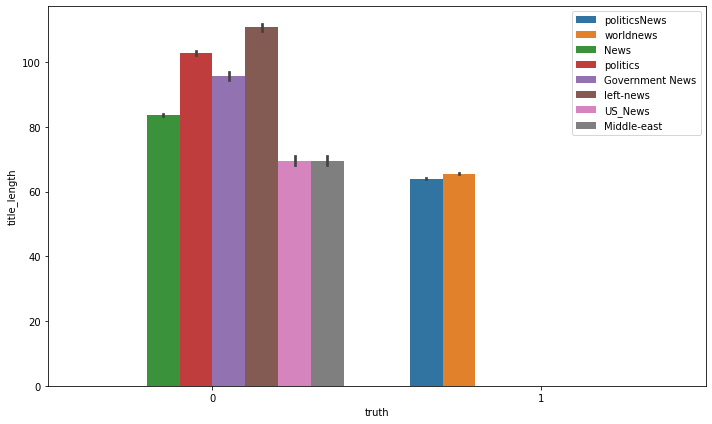

In [23]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'truth', y = 'title_length', data = news, hue = 'subject')
#plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()
plt.legend(loc='upper right')

## Getting the mean length of real and fake news for text and title lengths.

In [24]:
news.groupby('truth').mean()

,text_length,title_length
truth,,
0,2547.396235,94.198032
1,2383.278517,64.667881


It looks like text lengths are about the same, but title lengths for fake news are significantly longer.

## Getting some basic statistics on text and title lengths for fake and real news.

In [25]:
news.groupby('truth').describe()

text_length                                                         \
            count         mean          std  min     25%     50%     75%   
truth                                                                      
0         23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0   
1         21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0   

               title_length                                                 \
           max        count       mean        std   min   25%   50%    75%   
truth                                                                        
0      51794.0      23481.0  94.198032  27.184433   8.0  77.0  90.0  105.0   
1      29781.0      21417.0  64.667881   9.168999  26.0  59.0  64.0   70.0   

              
         max  
truth         
0      286.0  
1      133.0

## Graphing the text lengths to both real and fake news.

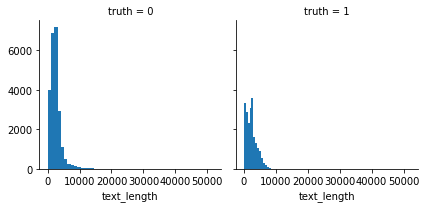

In [26]:
g = sns.FacetGrid(data = news, col = 'truth')
g.map(plt.hist, 'text_length', bins = 50)

## What percent of texts are longer than 10k words?

In [27]:
news[news['text_length'] >= 10000].count() / news['text_length'].count()

title           0.00784
text            0.00784
subject         0.00784
date            0.00784
truth           0.00784
text_length     0.00784
title_length    0.00784
dtype: float64

## Dropping texts that are longer than 10k words in length.

In [28]:
news.drop(news[news['text_length'] >= 10000].index, inplace = True)

In [29]:
news[news['text_length'] >= 10000].count() / news['text_length'].count()

title           0.0
text            0.0
subject         0.0
date            0.0
truth           0.0
text_length     0.0
title_length    0.0
dtype: float64

In [30]:
news.head()

,title,text,subject,date,truth,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204,69


## Graphing the length of titles for fake and real news.

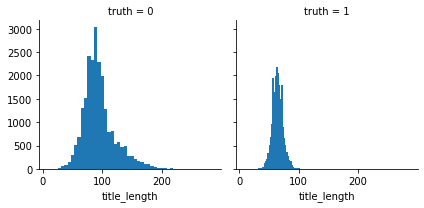

In [31]:
g = sns.FacetGrid(data = news, col = 'truth')
g.map(plt.hist, 'title_length', bins = 50)

## What percentage of titles are over 200 words?

In [32]:
news[news['title_length'] >= 200].count() / news['title_length'].count()

title           0.001644
text            0.001644
subject         0.001644
date            0.001644
truth           0.001644
text_length     0.001644
title_length    0.001644
dtype: float64

Less than 1% of the titles are longer than 200 words, so those can be dropped.

In [33]:
news.drop(news[news['title_length'] >= 200].index, inplace = True)

In [34]:
#news[news['title_length'] >= 200].count() / news['title_length'].count()
news[news['title_length'] >= 200].count() / news['title_length'].count()

title           0.0
text            0.0
subject         0.0
date            0.0
truth           0.0
text_length     0.0
title_length    0.0
dtype: float64

## Creating the X and Y, where X is the text of the news, and y is either fake news (0) or real news (1).

In [35]:
X = news['text']

In [36]:
y = news['truth']

## Importing CountVectorizer, fitting_transforming X, and resetting X to the fit_transformed.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer()

In [39]:
X = cv.fit_transform(X)

## Train_test_splitting the data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Importing Multinomial Naive Bayes, then training the model.

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
nb = MultinomialNB()

Fitting the data.

In [44]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predicting and checking how well the model performed.

In [45]:
predictions = nb.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[6490  381]
 [ 305 6100]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6871
           1       0.94      0.95      0.95      6405

    accuracy                           0.95     13276
   macro avg       0.95      0.95      0.95     13276
weighted avg       0.95      0.95      0.95     13276



The accuracy of predicting fake news is around 95%, with 6490 True Positives, 381 False Positives, 305 False Negatives, and 6100 True Negatives. Now, let's re-do this analysis using TfidfTransformer and Pipeline to see how they compare.

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [51]:
X = news['text']
y = news['truth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [53]:
predictions = pipeline.predict(X_test)

In [54]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[6487  384]
 [ 489 5916]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6871
           1       0.94      0.92      0.93      6405

    accuracy                           0.93     13276
   macro avg       0.93      0.93      0.93     13276
weighted avg       0.93      0.93      0.93     13276

